# Training Data EDA and Cleaning

## 1. Import libraries and load helper functions
This cell imports pandas, matplotlib, and a custom function for loading the training data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from utils import load_training_df, invert_direction, height_to_inches
import numpy as np

## 2. Load temporal training data and inspect columns
This cell loads the training data at the frame level and prints the first few rows and column names to understand the structure.

In [6]:
df_temp = load_training_df(method='left', temporal=True)
df_temp = invert_direction(df_temp)
df_temp['player_height'] = df_temp['player_height'].apply(height_to_inches)
print(df_temp.head())
print(df_temp.columns)

      game_id  play_id  player_to_predict  nfl_id  frame_id play_direction  \
0  2023090700      101              False   54527         1          right   
1  2023090700      101              False   54527         2          right   
2  2023090700      101              False   54527         3          right   
3  2023090700      101              False   54527         4          right   
4  2023090700      101              False   54527         5          right   

   absolute_yardline_number player_name  player_height  player_weight  ...  \
0                        42  Bryan Cook             73            210  ...   
1                        42  Bryan Cook             73            210  ...   
2                        42  Bryan Cook             73            210  ...   
3                        42  Bryan Cook             73            210  ...   
4                        42  Bryan Cook             73            210  ...   

  y_input     s     a     dir       o  num_frames_output  ball

## 3. Explore frame distribution per play
This cell visualizes the distribution of frame counts per play, which helps identify plays with unusual lengths or missing frames.

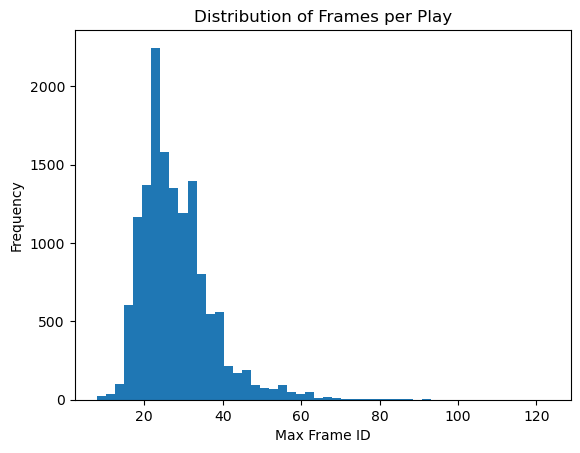

In [7]:
max_frames =df_temp.groupby(['game_id', 'play_id'])['frame_id'].max()
max_frames.plot(kind='hist', bins=50, title='Distribution of Frames per Play')
plt.xlabel('Max Frame ID')
plt.show()

## 4. Analyze play direction and play counts
This cell examines the number of unique plays by direction and game, which can reveal imbalances or missing data in certain directions.

In [8]:
# Get the number of unique play_id per play_direction and game_id
play_counts = df_temp.groupby(['play_direction', 'game_id'])['play_id'].nunique()
# Sum the unique play counts for each play_direction independently
play_direction_sums = play_counts.groupby('play_direction').sum()
print(play_direction_sums)

play_direction
left     6991
right    7117
Name: play_id, dtype: int64


## 5. Load static (play-level) data
This cell loads the training data at the play level, aggregating to the last frame for each player in each play.

In [13]:
df_static = load_training_df(method='left', temporal=False)
df_static = invert_direction(df_static)
df_static['player_height'] = df_static['player_height'].apply(height_to_inches)

## 6. Unique player roles and positions
These cells visualize the distribution of player roles and positions, helping to spot rare or missing categories.

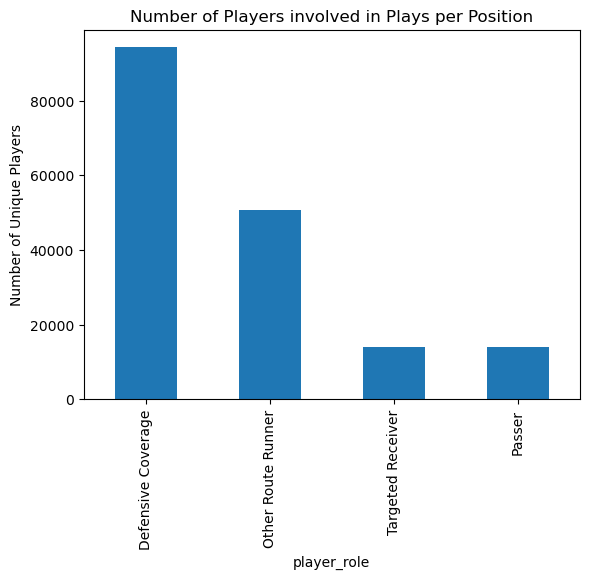

In [14]:
unique_players = df_static.drop_duplicates(subset=['game_id', 'play_id', 'nfl_id'])
role_counts = unique_players['player_role'].value_counts()
role_counts.plot(kind='bar', title='Number of Players involved in Plays per Position')
plt.xlabel('player_role')
plt.ylabel('Number of Unique Players')
plt.show()

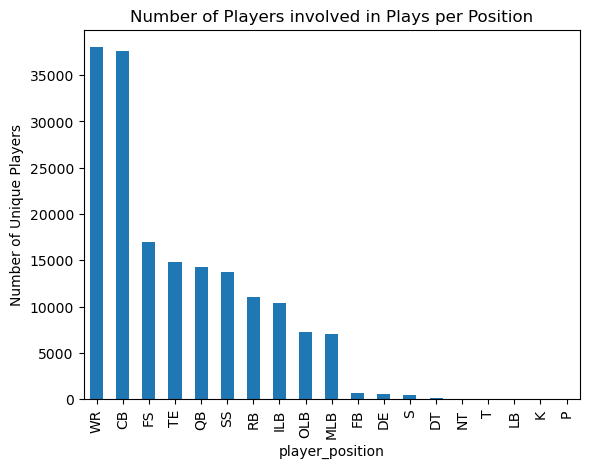

In [15]:
position_counts = unique_players['player_position'].value_counts()
position_counts.plot(kind='bar', title='Number of Players involved in Plays per Position')
plt.xlabel('player_position')
plt.ylabel('Number of Unique Players')
plt.show()

In [16]:
# Check missing values and data types in temporal data
print('Temporal Data Missing Values:')
print(df_temp.isnull().sum())
print('\nTemporal Data Types:')
print(df_temp.dtypes)

Temporal Data Missing Values:
game_id                           0
play_id                           0
player_to_predict                 0
nfl_id                            0
frame_id                          0
play_direction                    0
absolute_yardline_number          0
player_name                       0
player_height                     0
player_weight                     0
player_birth_date                 0
player_position                   0
player_side                       0
player_role                       0
x_input                           0
y_input                           0
s                                 0
a                                 0
dir                               0
o                                 0
num_frames_output                 0
ball_land_x                       0
ball_land_y                       0
x_target                    4320153
y_target                    4320153
dtype: int64

Temporal Data Types:
game_id                       int64

In [17]:
# Check missing values and data types in static data
print('Static Data Missing Values:')
print(df_static.isnull().sum())
print('\nStatic Data Types:')
print(df_static.dtypes)

Static Data Missing Values:
game_id                          0
play_id                          0
nfl_id                           0
player_to_predict                0
play_direction                   0
absolute_yardline_number         0
player_name                      0
player_height                    0
player_weight                    0
player_birth_date                0
player_position                  0
player_side                      0
player_role                      0
x_input                          0
y_input                          0
s                                0
a                                0
dir                              0
o                                0
num_frames_output                0
ball_land_x                      0
ball_land_y                      0
frame_id                    127105
x_target                    127105
y_target                    127105
dtype: int64

Static Data Types:
game_id                       int64
play_id                     

In [21]:
# Summarize numerical columns in temporal data
print('Temporal Data Numerical Summary:')
print(df_temp.describe())

Temporal Data Numerical Summary:
            game_id       play_id        nfl_id      frame_id  \
count  4.880579e+06  4.880579e+06  4.880579e+06  4.880579e+06   
mean   2.023155e+09  2.196409e+03  4.955890e+04  1.613179e+01   
std    2.011405e+05  1.246426e+03  5.210338e+03  1.113008e+01   
min    2.023091e+09  5.400000e+01  3.084200e+04  1.000000e+00   
25%    2.023101e+09  1.150000e+03  4.519800e+04  8.000000e+00   
50%    2.023111e+09  2.171000e+03  5.241300e+04  1.500000e+01   
75%    2.023121e+09  3.246000e+03  5.450000e+04  2.200000e+01   
max    2.024011e+09  5.258000e+03  5.667300e+04  1.230000e+02   

       absolute_yardline_number  player_height  player_weight       x_input  \
count              4.880579e+06   4.880579e+06   4.880579e+06  4.880579e+06   
mean               5.648078e+01   7.306844e+01   2.112783e+02  6.082777e+01   
std                2.279587e+01   2.254261e+00   2.217747e+01  2.347994e+01   
min                1.100000e+01   6.600000e+01   1.530000e+02  1.

In [18]:
# Summarize categorical columns in temporal data
print('Temporal Data Categorical Summary:')
for col in df_temp.select_dtypes(include='object').columns:
    print(f'\n{col} value counts:')
    print(df_temp[col].value_counts(dropna=False))

Temporal Data Categorical Summary:

play_direction value counts:
play_direction
right    2459074
left     2421505
Name: count, dtype: int64

player_name value counts:
player_name
Cameron Sutton      13641
Jared Goff          13517
Dak Prescott        13400
Darious Williams    13343
Patrick Mahomes     13299
                    ...  
Tremon Smith           17
Tae Davis              15
Thomas Incoom          15
Tre'Quan Smith         12
Kwamie Lassiter        11
Name: count, Length: 1383, dtype: int64

player_birth_date value counts:
player_birth_date
1993-01-22    24787
1996-05-21    23168
1999-10-06    23146
1996-05-16    21936
1999-04-19    21231
              ...  
1991-05-23       18
2000-03-06       18
1996-07-20       17
1996-08-14       15
1996-01-07       12
Name: count, Length: 1132, dtype: int64

player_position value counts:
player_position
WR     1063660
CB     1056888
FS      476865
TE      417146
QB      401007
SS      392421
RB      314918
ILB     295593
OLB     207429
ML

In [23]:
# Summarize numerical columns in static data
print('Static Data Numerical Summary:')
print(df_static.describe())

Static Data Numerical Summary:
            game_id        play_id         nfl_id  absolute_yardline_number  \
count  6.900410e+05  690041.000000  690041.000000             690041.000000   
mean   2.023156e+09    2214.129137   49626.767580                 57.142139   
std    2.021944e+05    1246.927698    5120.398686                 22.935078   
min    2.023091e+09      54.000000   30842.000000                 11.000000   
25%    2.023101e+09    1177.000000   45345.000000                 38.000000   
50%    2.023111e+09    2196.000000   52417.000000                 53.000000   
75%    2.023121e+09    3272.000000   54496.000000                 74.000000   
max    2.024011e+09    5258.000000   56673.000000                109.000000   

       player_height  player_weight        x_input        y_input  \
count  690041.000000  690041.000000  690041.000000  690041.000000   
mean       72.855177     209.010372      66.317767      26.519593   
std         2.128730      21.794558      23.193425

In [24]:
# Summarize categorical columns in static data
print('Static Data Categorical Summary:')
for col in df_static.select_dtypes(include='object').columns:
    print(f'\n{col} value counts:')
    print(df_static[col].value_counts(dropna=False))

Static Data Categorical Summary:

play_direction value counts:
play_direction
right    346719
left     343322
Name: count, dtype: int64

player_name value counts:
player_name
Brandon Stephens       2530
Cameron Sutton         2510
James Bradberry        2472
Tyrann Mathieu         2448
Ahkello Witherspoon    2434
                       ... 
Greg Gaines               1
Jonathan Harris           1
Michael Bandy             1
Tremon Smith              1
Blake Gillikin            1
Name: count, Length: 1383, dtype: int64

player_birth_date value counts:
player_birth_date
1993-01-22    4054
1999-04-19    3472
1999-03-03    3450
1996-07-08    3203
1999-06-16    3197
              ... 
1995-12-20       1
1997-11-23       1
2000-07-07       1
1997-10-03       1
1984-08-10       1
Name: count, Length: 1132, dtype: int64

player_position value counts:
player_position
CB     196960
WR     137458
FS      83719
SS      66471
ILB     46729
TE      43802
OLB     32979
MLB     32218
RB      27584
QB  

## 7. Next steps: Data cleaning and further EDA
The following cells will:
- Check for missing values and data types
- Summarize numerical and categorical columns
- Identify outliers and unusual values
- Suggest areas needing cleaning

## 8. Identify outliers and unusual values
The following cell will plot distributions for selected numerical columns to help spot outliers and data quality issues.

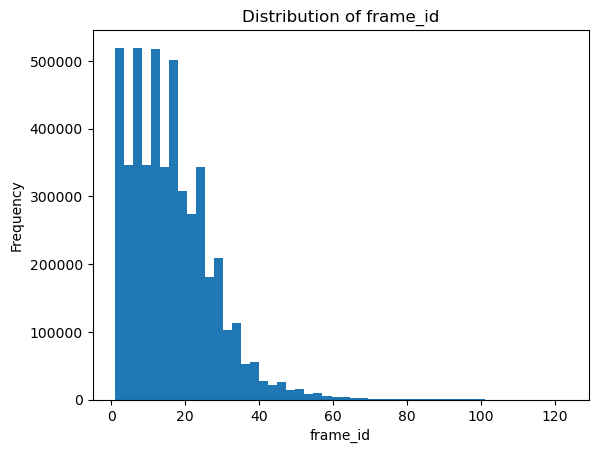

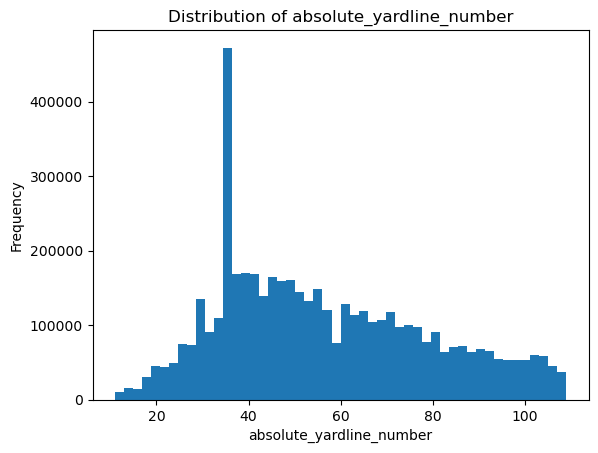

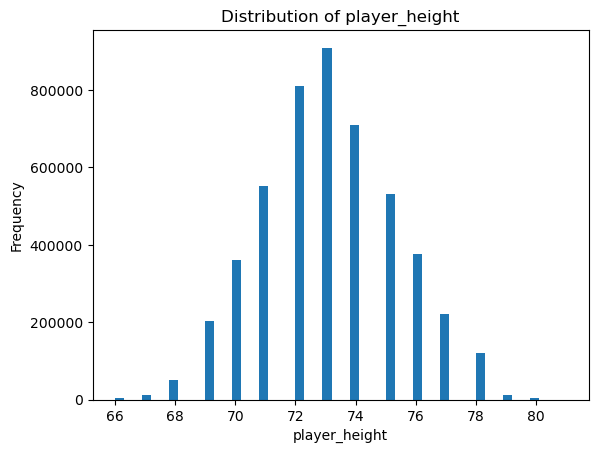

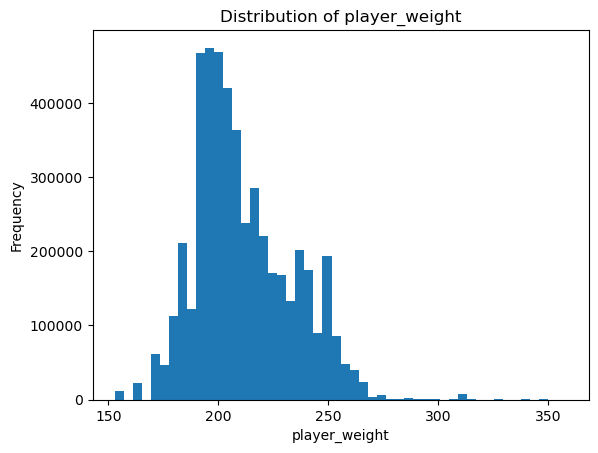

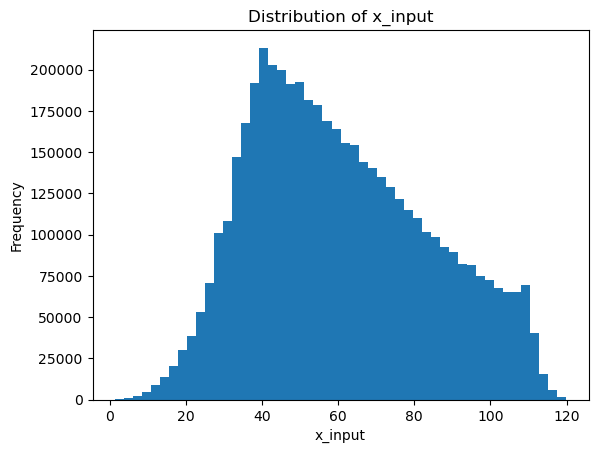

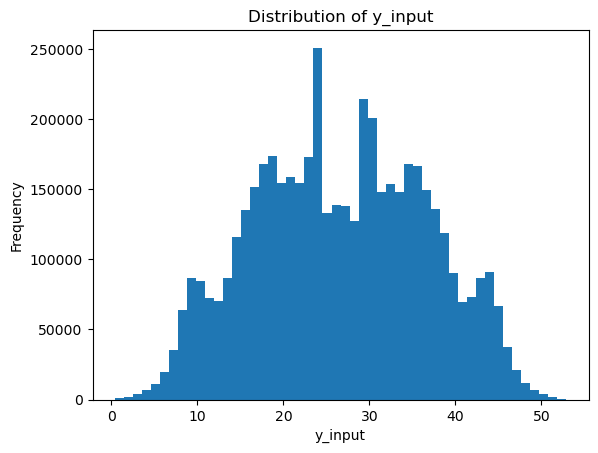

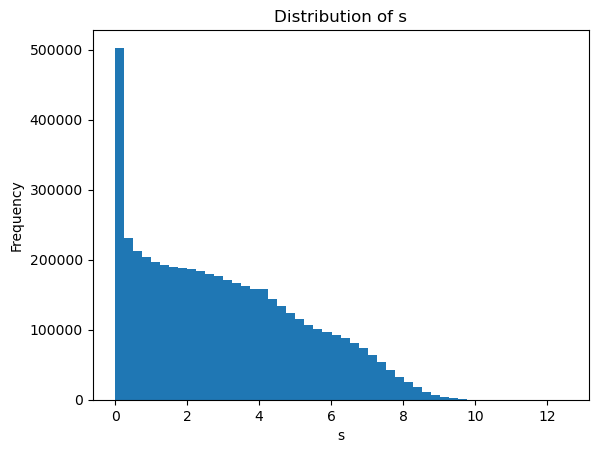

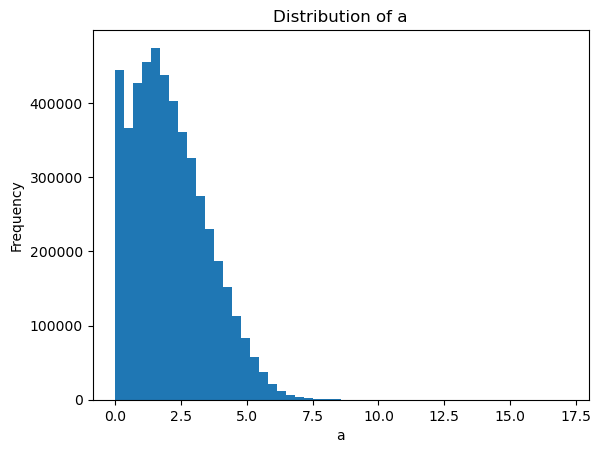

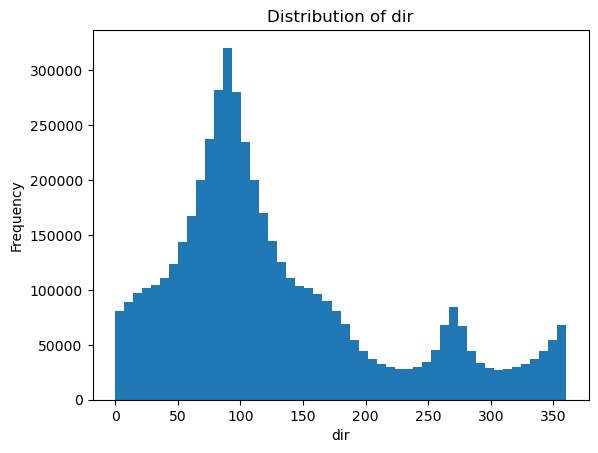

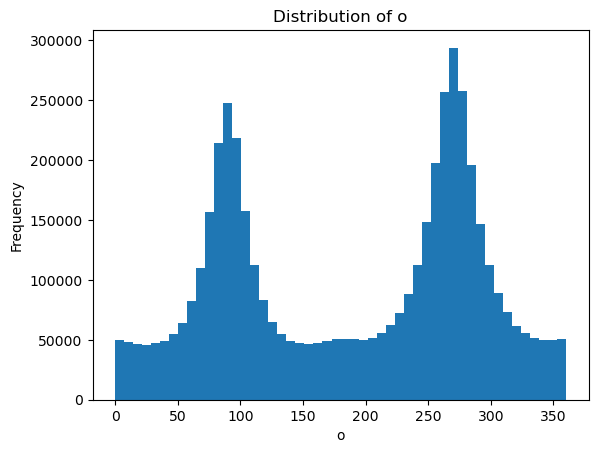

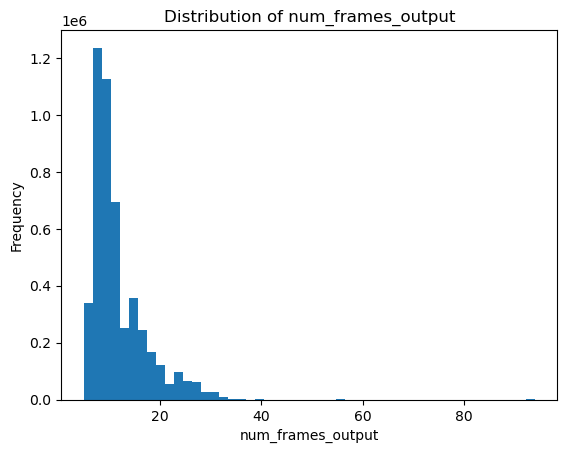

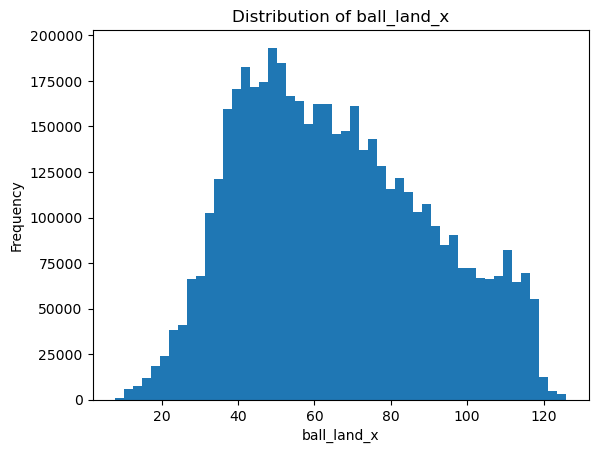

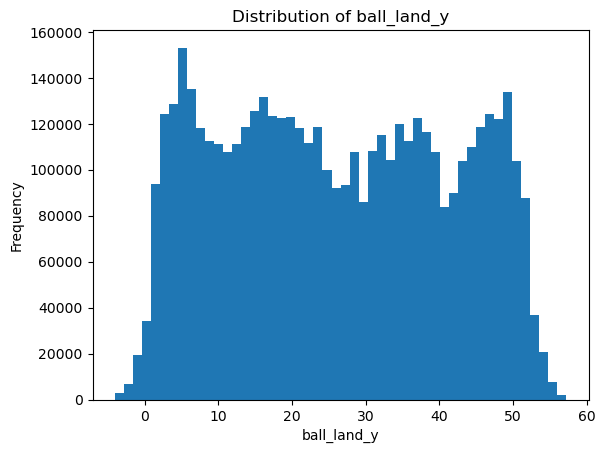

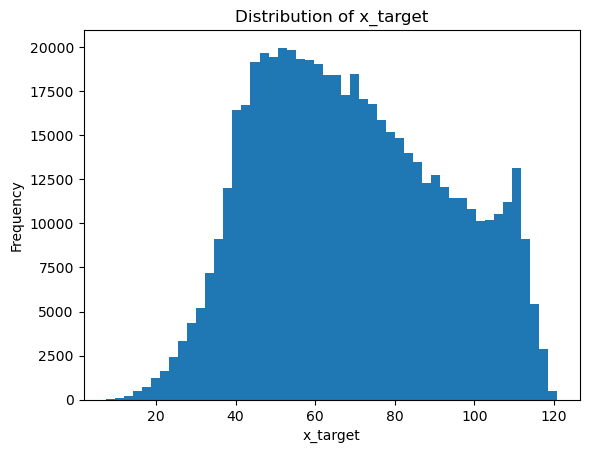

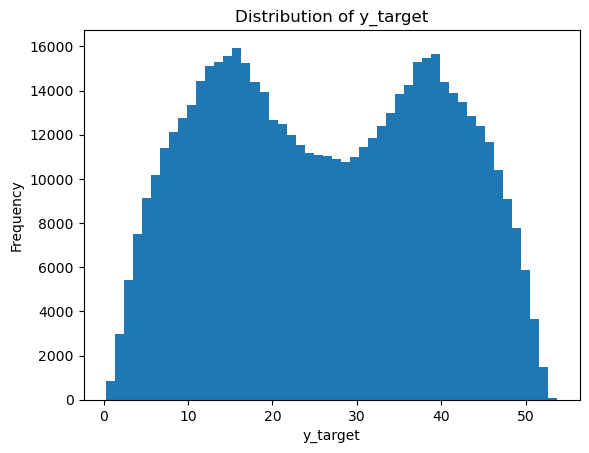

In [25]:
# Plot distributions for selected numerical columns in temporal data
num_cols = df_temp.select_dtypes(include=['float64', 'int64']).columns
for col in num_cols:
    if col in ['game_id', 'play_id', 'nfl_id']:
        continue
    df_temp[col].plot(kind='hist', bins=50, title=f'Distribution of {col}')
    plt.xlabel(col)
    plt.show()

## 9. Summary of cleaning needs
Based on the above EDA, this document does not contain any null values or extreme outliers.

## 10. Conditional Stats
How do player metrics vary by player_role or player_position

In [36]:
selected_cols = ['player_role', 'player_height', 'player_weight', 's', 'a', 'o', 'dir']
df_grouped = df_temp[selected_cols].groupby('player_role')
for col in selected_cols:
    if col == 'player_role':
        continue
    print(f'\n--- Description for {col} ---')
    print(df_grouped[col].describe())


--- Description for player_height ---
                        count       mean       std   min   25%   50%   75%  \
player_role                                                                  
Defensive Coverage  2662657.0  72.588967  1.774879  68.0  71.0  73.0  74.0   
Other Route Runner  1424243.0  73.435853  2.739416  66.0  71.0  74.0  76.0   
Passer               396765.0  74.566020  1.684445  70.0  73.0  75.0  76.0   
Targeted Receiver    396914.0  73.469590  2.675754  66.0  71.0  73.0  76.0   

                     max  
player_role               
Defensive Coverage  80.0  
Other Route Runner  80.0  
Passer              78.0  
Targeted Receiver   81.0  

--- Description for player_weight ---
                        count        mean        std    min    25%    50%  \
player_role                                                                 
Defensive Coverage  2662657.0  208.729888  20.703064  170.0  195.0  203.0   
Other Route Runner  1424243.0  213.369730  25.419720  153.0 

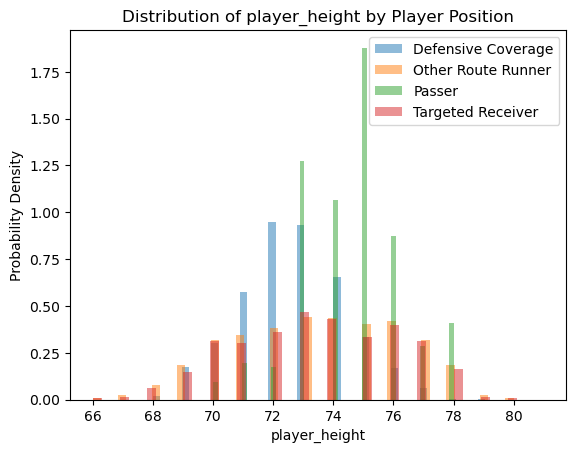

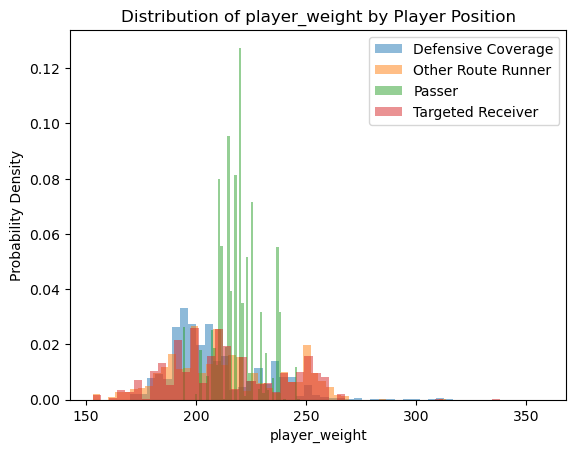

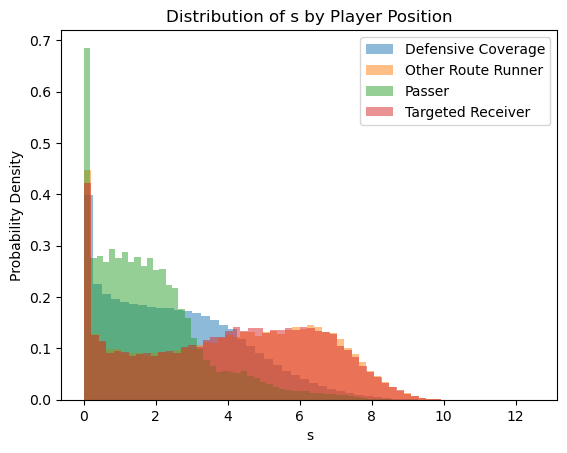

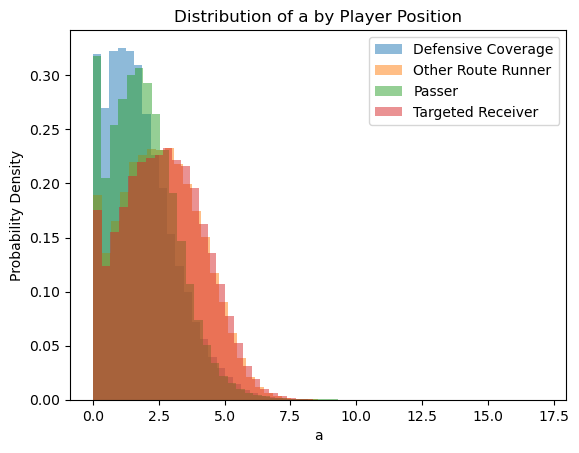

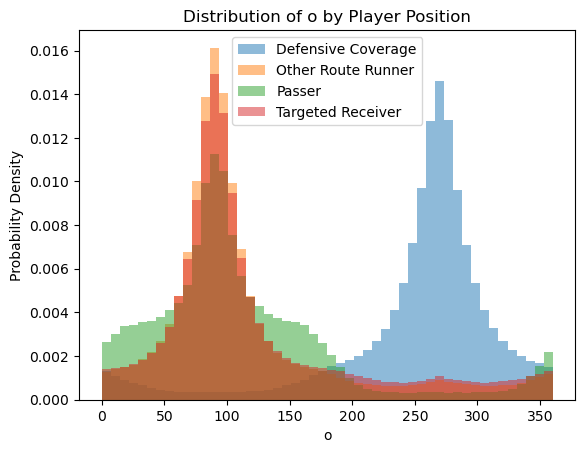

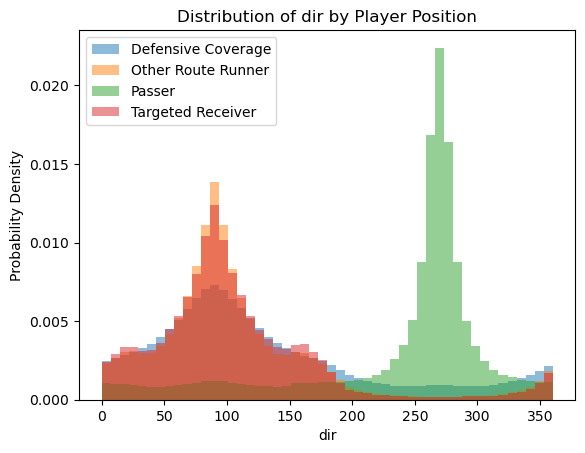

In [39]:
for col in selected_cols:
    if col in ['player_role']:
        continue
    df_grouped[col].plot(kind='hist', bins=50, density=True, alpha=0.5, title=f'Distribution of {col} by Player Position', legend=True)
    plt.xlabel(col)
    plt.ylabel('Probability Density')
    plt.show()


In [41]:
selected_cols = ['player_position', 'player_height', 'player_weight', 's', 'a', 'o', 'dir']
df_grouped = df_temp[selected_cols].groupby('player_position')
for col in selected_cols:
    if col == 'player_position':
        continue
    print(f'\n--- Description for {col} ---')
    print(df_grouped[col].describe())


--- Description for player_height ---
                     count       mean       std   min   25%   50%   75%   max
player_position                                                              
CB               1056888.0  72.016248  1.622930  68.0  71.0  72.0  73.0  76.0
DE                 16932.0  76.267895  1.230382  72.0  76.0  76.0  77.0  79.0
DT                  3139.0  75.212488  2.054800  72.0  73.0  75.0  76.0  80.0
FB                 19584.0  73.232077  1.301275  71.0  72.0  73.0  75.0  75.0
FS                476865.0  71.961140  1.529109  68.0  71.0  72.0  73.0  76.0
ILB               295593.0  73.467978  1.202144  71.0  73.0  73.0  74.0  76.0
K                     23.0  70.000000  0.000000  70.0  70.0  70.0  70.0  70.0
LB                    31.0  74.000000  0.000000  74.0  74.0  74.0  74.0  74.0
MLB               199983.0  73.982469  1.494073  71.0  73.0  74.0  75.0  77.0
NT                  1090.0  74.757798  1.161859  71.0  75.0  75.0  75.0  76.0
OLB               207429.

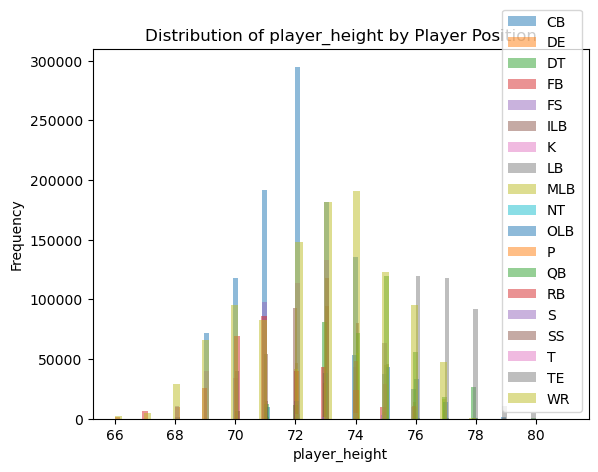

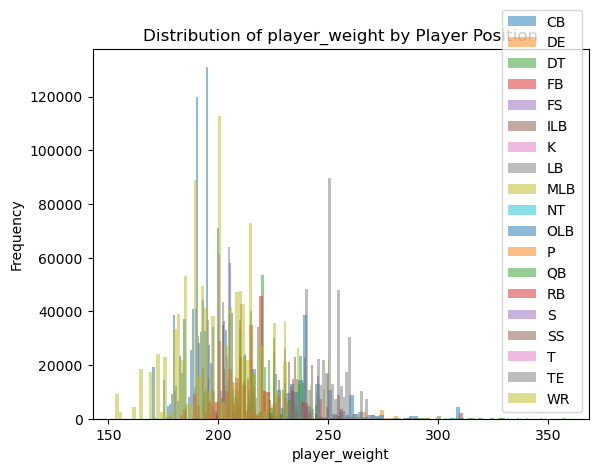

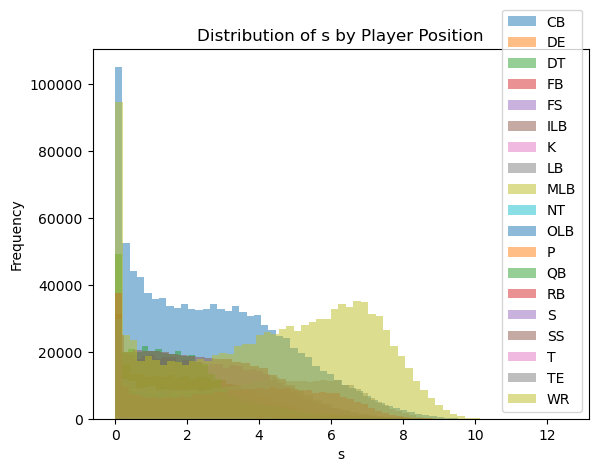

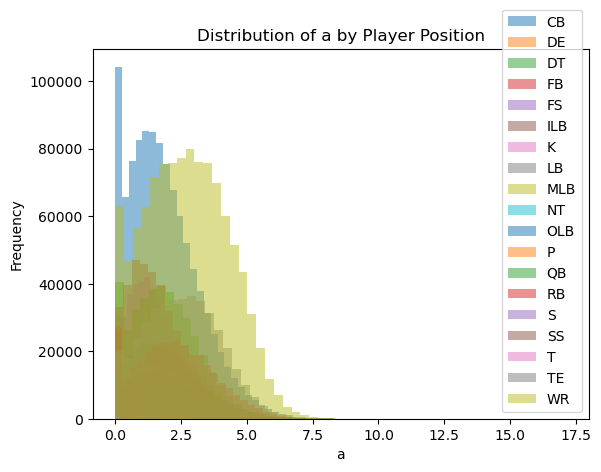

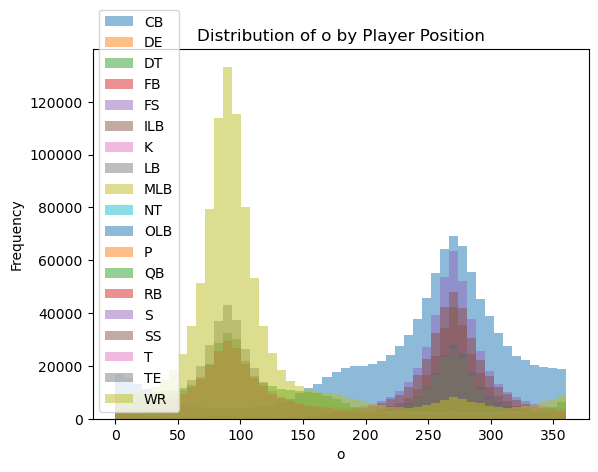

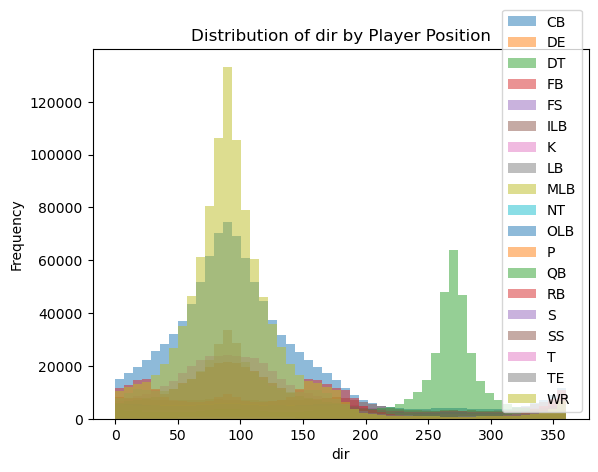

In [43]:
for col in selected_cols:
    if col in ['player_position']:
        continue
    df_grouped[col].plot(kind='hist', bins=50, density=False, alpha=0.5, title=f'Distribution of {col} by Player Position', legend=True)
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
